In [1]:
import traffic_light_classifier as tlc


Importing package 'traffic_light_classifier'...

 + Adding subpackage '__dependencies_subpkg__'...
   + Adding submodule '__dependencies_subpkg__.dependencies_submod'...
   - Done!
 - Done!

 + Adding subpackage '__constants_subpkg__'...
   + Adding submodule '__constants_subpkg__.constants_submod'...
   - Done!
 - Done!

 + Adding subpackage '__auxil_subpkg__'...
   + Adding submodule '__auxil_subpkg__.auxil_submod'...
   - Done!
   + Adding submodule '__auxil_subpkg__.helpers'...
   - Done!
 - Done!

 + Adding subpackage '__tests_subpkg__'...
   + Adding submodule '__tests_subpkg__.test_functions'...
   - Done!
 - Done!

 + Adding subpackage 'plots_subpkg'...
   + Adding submodule 'plots_subpkg.plots'...
   - Done!
 - Done!

 + Adding subpackage 'modify_images_subpkg'...
   + Adding submodule 'modify_images_subpkg.modify_images'...
   - Done!
 - Done!

 + Adding subpackage 'extract_feature_subpkg'...
   + Adding submodule 'extract_feature_subpkg.extract_feature'...
   - Done!
 - Don

# Traffic Light Classifier
---

In this project, I have used my knowledge of computer vision techniques to build a classifier for images of traffic lights! We have given dataset of traffic light images in which one of three lights is illuminated: Red, Yellow, or Green.

In this notebook, we will pre-process these images, extract features that will help us distinguish the different types of images, and use those features to classify the traffic light images into three classes: Red, Yellow, or Green. The tasks will be broken down into a few sections:

1. **Loading and visualizing the data**. 
      The first step in any classification task is to be familiar with our data; we will need to load in the images of traffic lights and visualize them!

2. **Pre-processing**. 
    The input images and output labels need to be standardized. This way, we can analyze all the input images using the same classification pipeline, and we know what output to expect when we eventually classify a *new* image.
    
3. **Feature extraction**. 
    Next, we will extract some features from each image that will help distinguish and eventually classify these images.
   
4. **Classification and visualizing error**. 
    Finally, we will write one function that uses your features to classify *any* traffic light image. This function will take in an image and output a label. We will also write a code to determine the accuracy of your classification model.   
    
5. **Evaluate your model**.
    Our classifier must be >90% accurate and never classify any red lights as green; it's likely that we will need to improve the accuracy of your classifier by changing existing features or adding new features.
    
Here are some sample images from the dataset (from left to right: Red, Green, and Yellow traffic lights):
<img src="images/all_lights.png" width="50%" height="50%">


# 1. Loading and Visualizing the Traffic Light Dataset

This traffic light dataset consists of 1484 number of color images in 3 categories - Red, Yellow, and Green. As with most human-sourced data, the data is not evenly distributed among the types. There are:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

*Note: All images come from this [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).*

### Import resources

In [2]:
# import cv2 # computer vision library
# import helpers # helper functions
# import random
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg # for loading in images
# import helpers
# import plot
# import modify_images
# import extract_feature
# %matplotlib inline

## Training and Testing Data

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images, for us to use as you create a classifier.
* 20% are test images, which will be used to test the accuracy of your classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

## Define the image directories

First, we set some variables to keep track of some where our images are stored:

    IMAGE_DIR_TRAINING: the directory where our training image data is stored
    IMAGE_DIR_TEST: the directory where our test image data is stored

In [3]:
# Image data directories >>
IMAGE_DIR_TRAINING = "traffic_light_images/training/"
IMAGE_DIR_TEST     = "traffic_light_images/test/"

## Load the datasets

These first few lines of code will load the training traffic light images and store all of them in a variable, `IMAGES_TRAIN`. This list contains the images and their associated label ("red", "yellow", "green"). 

We are using [glob library](https://pymotw.com/2/glob/) to read image files from a directory. The `load_dataset` function takes in the name of an image directory and returns a list of images and their associated labels. 

For example, the first image-label pair in `IMAGES_TRAIN` can be accessed by index: 
``` IMAGES_TRAIN[0][:]```.


In [4]:
# Loading training data >>
# IMAGES_TRAIN = helpers.load_dataset(IMAGE_DIR_TRAINING)
IMAGES_TRAIN = tlc.helpers.load_dataset(IMAGE_DIR_TRAINING)

## Visualize the Data

The first steps in analyzing any dataset are to:

1. Load the data.
2. Look at the data.

Seeing what it looks like will give us an idea of:

- What to look for in the images.
- What kind of noise or inconsistencies we have to deal with, and so on.

This will help us understand the image dataset, and **understanding a dataset is part of making predictions about the data**.

---
### Visualize the input images

Visualize and explore the image data!
* Display the image
* Print out the shape of the image 
* Print out its corresponding label

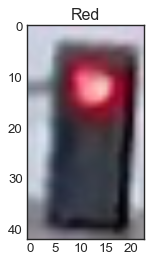

In [5]:
tlc.plots.plot_images( IMAGES_TRAIN[0] , title_enabled = True )

In [6]:
IMAGES_TRAIN_red    = [ image for image in IMAGES_TRAIN if image[1] == "red" ]
IMAGES_TRAIN_yellow = [ image for image in IMAGES_TRAIN if image[1] == "yellow" ]
IMAGES_TRAIN_green  = [ image for image in IMAGES_TRAIN if image[1] == "green" ]

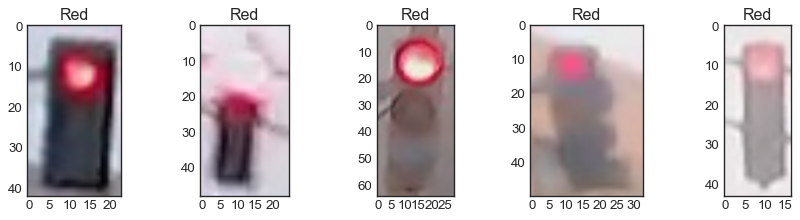

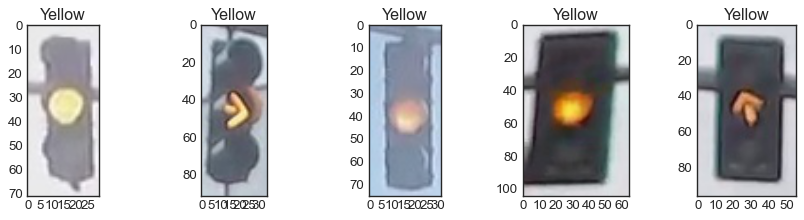

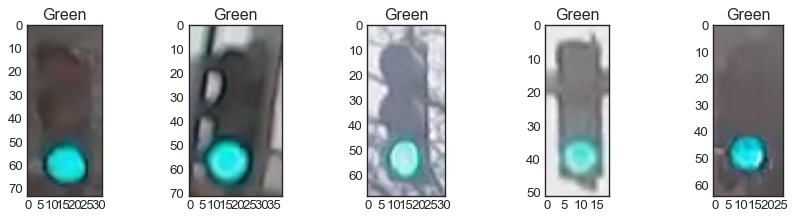

In [7]:
# Visualizing images of different color >>
tlc.plots.plot_images( IMAGES_TRAIN_red[0:5],    title_enabled = True, figsizeScale = 0.8 )
tlc.plots.plot_images( IMAGES_TRAIN_yellow[0:5], title_enabled = True, figsizeScale = 0.8 )
tlc.plots.plot_images( IMAGES_TRAIN_green[0:5],  title_enabled = True, figsizeScale = 0.8 )

# 2. Pre-process the Data

After loading in each image, you have to standardize the input and output!

### Input

This means that every input image should have:

1. The same format,
2. The same size, and so on.

We'll be creating features by performing the same analysis on every picture, and for a classification task like this, it's important that **similar images create similar features**! 

### Output

We also need the output to be a label that is easy to read and easy to compare with other labels. It is good practice to convert categorical data like "red" and "green" to numerical data.

A very common classification output is a 1D list that is the length of the number of classes - three in the case of red, yellow, and green lights - with the values 0 or 1 indicating which class a certain image is.  

For example, since we have three classes (red, yellow, and green), we can make a list with the order: [red value, yellow value, green value]. In general, order does not matter, we choose the order [red value, yellow value, green value] in this case to reflect the position of each light in descending vertical order.

Lights should have labels:  
A red light: [1, 0, 0].  
A yellow light: [0, 1, 0].  
A green light: [0, 0, 1].  

These labels are called **one-hot encoded labels**.

*(Note: one-hot encoding will be especially important when you work with [machine learning algorithms](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)).*

<img src="images/processing_steps.png" width="80%" height="80%">


---
<a id='task2'></a>
### Standardize the input images

* Resize each image to the desired input size: 32x32px.
* (Optional) You may choose to crop, shift, or rotate the images in this step as well.

It's very common to have square input sizes that can be rotated (and remain the same size), and analyzed in smaller, square patches. It's also important to make all your images the same size so that they can be sent through the same pipeline of classification steps!

### Standardize the output

With each loaded image, we also specify the expected output. For this, we use **one-hot encoding**.

* One-hot encode the labels. To do this, create an array of zeros representing each class of traffic light (red, yellow, green), and set the index of the expected class number to 1. 

Since we have three classes (red, yellow, and green), we have imposed an order of: [red value, yellow value, green value]. To one-hot encode, say, a yellow light, we would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].


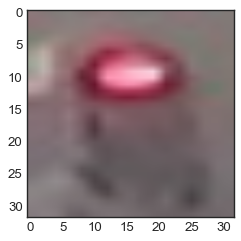

In [8]:
image_std = tlc.modify_images.standardize_image(IMAGES_TRAIN[20][0])
tlc.plots.plot_images(image_std)

---
<a id='task3'></a>
### One-hot encoding

One hot encode = [1, 0, 0]


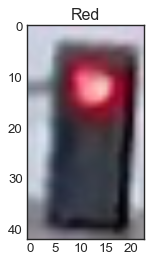

In [9]:
i_image = 0
tlc.plots.plot_images( IMAGES_TRAIN[i_image] )
encode = tlc.helpers.one_hot_encode( IMAGES_TRAIN[i_image][1] )
print(f"One hot encode = {encode}")

In [10]:
tlc.helpers.one_hot_encode_reverse( encode )

'Red'

### Testing as you Code

After programming a function like this, it's a good idea to test it, and see if it produces the expected output. **In general, it's good practice to test code in small, functional pieces, after you write it**. This way, you can make sure that your code is correct as you continue to build a classifier, and you can identify any errors early on so that they don't compound.

All test code can be found in the file `test_functions.py`. You are encouraged to look through that code and add your own testing code if you find it useful!

One test function you'll find is: `test_one_hot(self, one_hot_function)` which takes in one argument, a one_hot_encode function, and tests its functionality. If your one_hot_label code does not work as expected, this test will print ot an error message that will tell you a bit about why your code failed. Once your code works, this should print out TEST PASSED.

In [11]:
# Importing the tests
# from traffic_light_classifier import test_functions
tests = tlc.test_functions.Tests()

# Test for one_hot_encode function
tests.test_one_hot(tlc.helpers.one_hot_encode)


**<span style="color: green;">TEST PASSED</span>**

## Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work!


In [12]:
images_train_std        = tlc.modify_images.standardize_images(IMAGES_TRAIN)
images_train_std_red    = tlc.modify_images.standardize_images(IMAGES_TRAIN_red)
images_train_std_yellow = tlc.modify_images.standardize_images(IMAGES_TRAIN_yellow)
images_train_std_green  = tlc.modify_images.standardize_images(IMAGES_TRAIN_green)

## Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

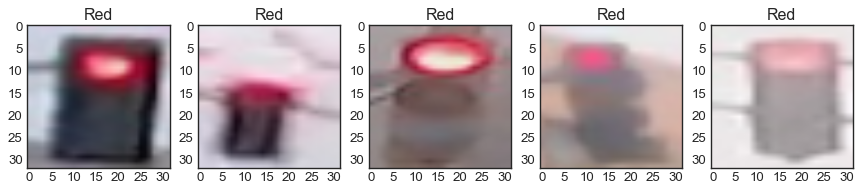

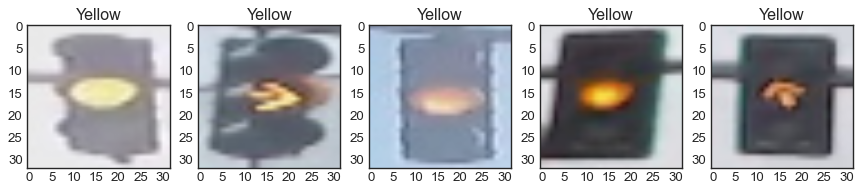

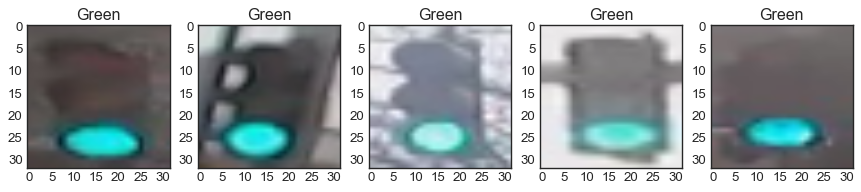

In [13]:
tlc.plots.plot_images( images_train_std_red[0:5],    figsizeScale = 0.8 )
tlc.plots.plot_images( images_train_std_yellow[0:5], figsizeScale = 0.8 )
tlc.plots.plot_images( images_train_std_green[0:5],  figsizeScale = 0.8 )

# 3. Feature Extraction

We will be using knowledge of color spaces, shape analysis, and feature construction to create features that help distinguish and classify the three types of traffic light images.

1. A brightness feature.


These features will be combined near the end of this notebook to form a complete classification algorithm.

## Creating a brightness feature 

There are a number of ways to create a brightness feature that will help you characterize images of traffic lights, and it will be up to you to decide on the best procedure to complete this step. You should visualize and test your code as you go.

Pictured below is a sample pipeline for creating a brightness feature (from left to right: standardized image, HSV color-masked image, cropped image, brightness feature):

<img src="images/feature_ext_steps.png" width="70%" height="70%">


## RGB to HSV conversion

Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

In [14]:
i_image  = 0
test_im    = images_train_std[i_image][0]
test_label = images_train_std[i_image][1]

### RGB Image

RGB image
Label [red, yellow, green]: [1, 0, 0]


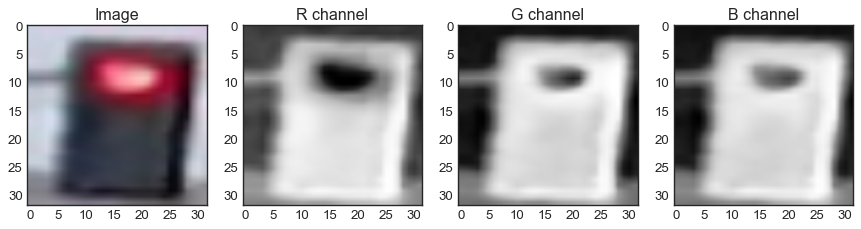

In [15]:
# plotting rgb channels
print("RGB image")
tlc.plots.plot_channels(test_im, cmap = None)

# Print image label
print('Label [red, yellow, green]: ' + str(test_label))

### RGB Image (grayscale)

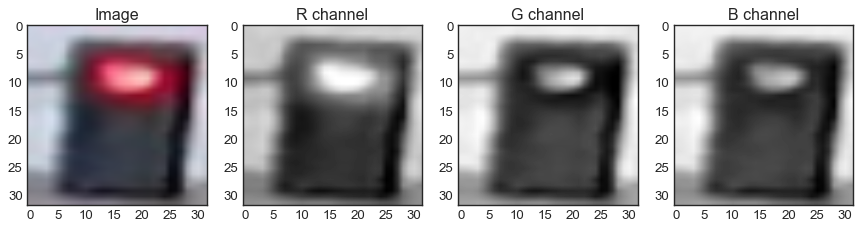

In [16]:
image_hsv = tlc.plots.plot_channels(test_im, cmap="gray")

### HSV Image

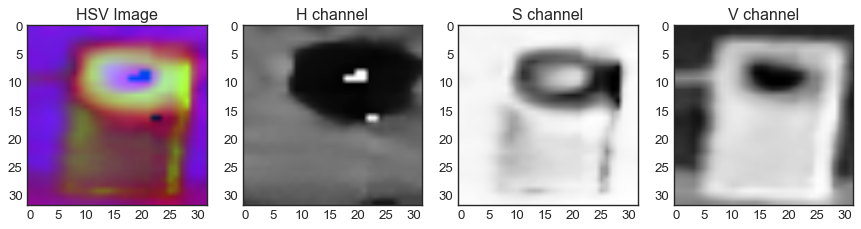

In [17]:
image_hsv = tlc.modify_images.convert_rgb_to_hsv(test_im, cmap = None, plot_enabled = True)

### HSV Image (grayscale)

Converted hsv image


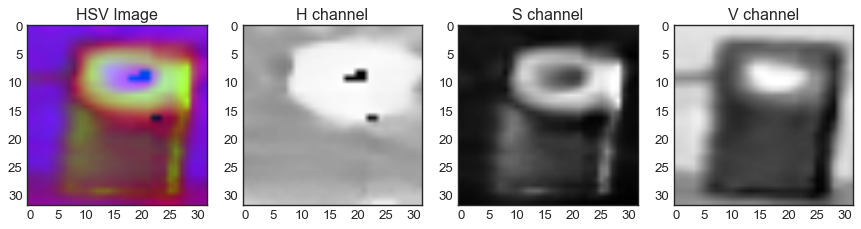

In [18]:
print("Converted hsv image")
image_hsv = tlc.modify_images.convert_rgb_to_hsv(test_im, cmap = "gray", plot_enabled = True)

## Average H, S, V of all red images, all rellow images and all green images

In [19]:
# image_avg        = tlc.extract_feature.get_average_image(images_train_std)
image_avg_red    = tlc.extract_feature.get_average_image(images_train_std_red)
image_avg_yellow = tlc.extract_feature.get_average_image(images_train_std_yellow)
image_avg_green  = tlc.extract_feature.get_average_image(images_train_std_green)

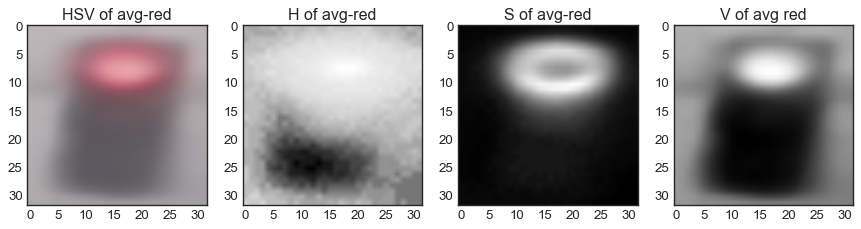

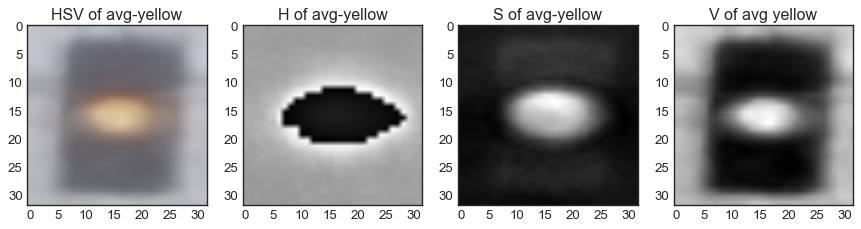

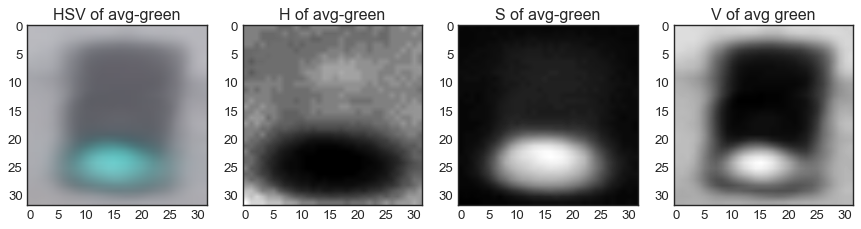

In [20]:
# tlc.plots.plot_channels(image_avg,        channels = "hsv", titles = ["HSV of avg",        "H of avg",        "S of avg",        "V of avg"])
tlc.plots.plot_channels(image_avg_red,    channels = "hsv", titles = ["HSV of avg-red",    "H of avg-red",    "S of avg-red",    "V of avg red"])
tlc.plots.plot_channels(image_avg_yellow, channels = "hsv", titles = ["HSV of avg-yellow", "H of avg-yellow", "S of avg-yellow", "V of avg yellow"])
tlc.plots.plot_channels(image_avg_green,  channels = "hsv", titles = ["HSV of avg-green",  "H of avg-green",  "S of avg-green",  "V of avg green"])


### Locating high saturation region

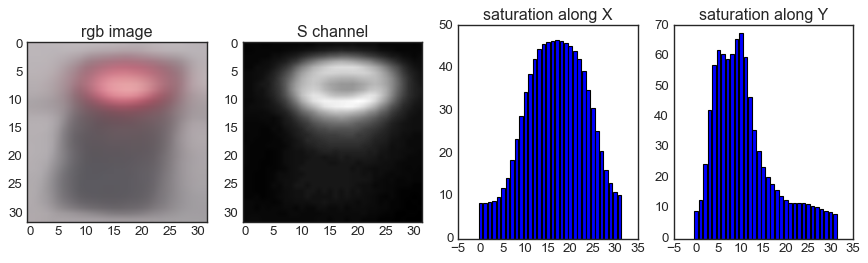

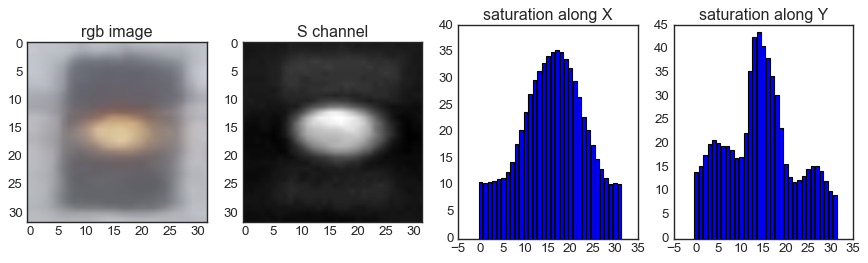

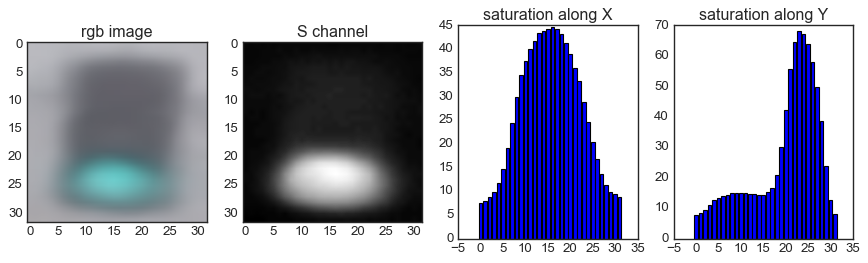

Range of high Saturation for average of Red    images: X = (12, 24), Y = (3, 15)
Range of high Saturation for average of Yellow images: X = (11, 23), Y = (8, 20)
Range of high Saturation for average of Green  images: X = (10, 22), Y = (18, 30)
 


In [21]:
size = 12
# range_avg_s    , _    = get_range_of_high_average_channel( image_avg,        "s", size, plot_enabled=True)
range_avg_s_red, _    = tlc.extract_feature.get_range_of_high_average_channel( image_avg_red,    "s", size, plot_enabled=True)
range_avg_s_yellow, _ = tlc.extract_feature.get_range_of_high_average_channel( image_avg_yellow, "s", size, plot_enabled=True)
range_avg_s_green, _  = tlc.extract_feature.get_range_of_high_average_channel( image_avg_green,  "s", size, plot_enabled=True)
# print(f"Range of high Saturation for average           images: X = {range_avg_s[0]}, Y = {range_avg_s[1]}")
print(f"Range of high Saturation for average of Red    images: X = {range_avg_s_red[0]}, Y = {range_avg_s_red[1]}")
print(f"Range of high Saturation for average of Yellow images: X = {range_avg_s_yellow[0]}, Y = {range_avg_s_yellow[1]}")
print(f"Range of high Saturation for average of Green  images: X = {range_avg_s_green[0]}, Y = {range_avg_s_green[1]}")
print(" ")


### Masking high saturation region

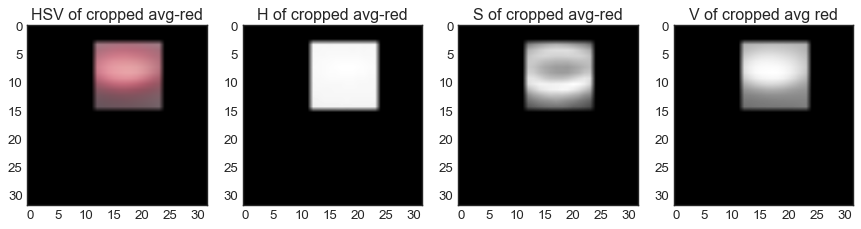

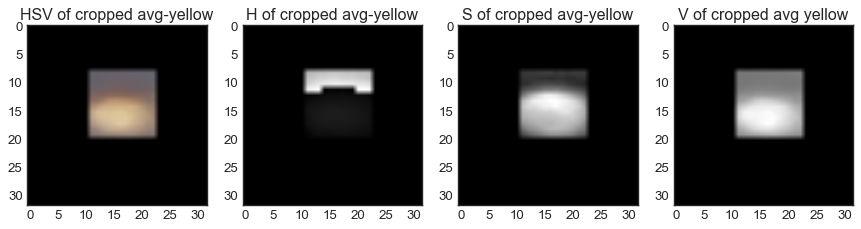

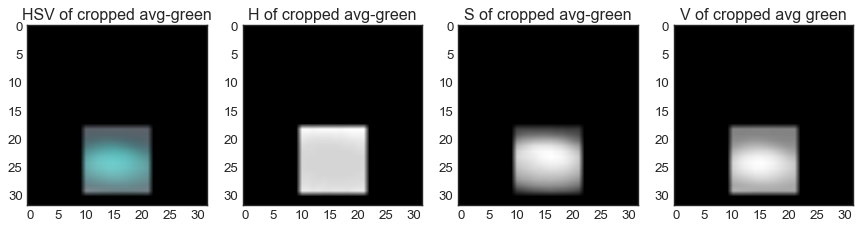

In [22]:
# image_masked        = tlc.modify_images.mask_image( image_avg,        range_avg_s[0],        range_avg_s[1] )
image_masked_red    = tlc.modify_images.mask_image( image_avg_red,    range_avg_s_red[0],    range_avg_s_red[1] )
image_masked_yellow = tlc.modify_images.mask_image( image_avg_yellow, range_avg_s_yellow[0], range_avg_s_yellow[1] )
image_masked_green  = tlc.modify_images.mask_image( image_avg_green , range_avg_s_green[0],  range_avg_s_green[1] )

# tlc.plots.plot_channels(image_masked,        channels = "hsv", titles = ["HSV of cropped avg",        "H of cropped avg",        "S of cropped avg",        "V of cropped avg"])
tlc.plots.plot_channels(image_masked_red,    channels = "hsv", titles = ["HSV of cropped avg-red",    "H of cropped avg-red",    "S of cropped avg-red",    "V of cropped avg red"])
tlc.plots.plot_channels(image_masked_yellow, channels = "hsv", titles = ["HSV of cropped avg-yellow", "H of cropped avg-yellow", "S of cropped avg-yellow", "V of cropped avg yellow"])
tlc.plots.plot_channels(image_masked_green,  channels = "hsv", titles = ["HSV of cropped avg-green",  "H of cropped avg-green",  "S of cropped avg-green",  "V of cropped avg green"])
